## 建立神經網路

In [4]:
def func(x):
    return x ** 2

In [5]:
def dfunc(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [6]:
def tfunc(f, x, t):
    d= dfunc(f,x)
    y= f(x)-d*x
    return d * t + y

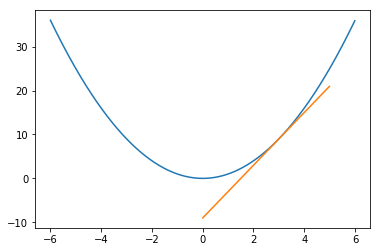

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-6,6, 0.01)
y= func(x)
plt.plot(x,y)
x2= np.arange(0,5, 0.01)
y2= tfunc(func, 3, x2)
plt.plot(x2, y2)

In [8]:
dfunc(func, 3)

6.000000000012662

In [9]:
def gradient_descent(func, init_x, lr = 0.3, epochs = 100):
    x = init_x
    res = [x]
    for i in range(epochs):
        grad = dfunc(func,x)
        x = x - grad * lr
        res.append(x)
    return np.array(res)

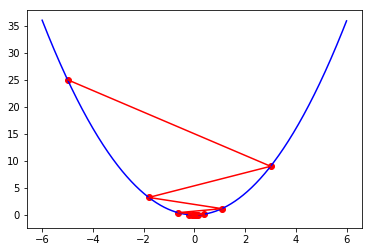

In [10]:
x = gradient_descent(func, -5, lr=0.8)
t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')
plt.scatter(x, func(x), c='r')
plt.show()

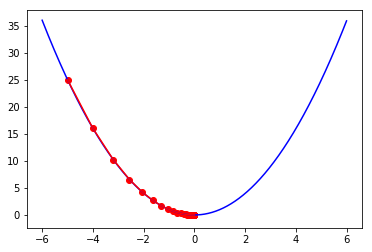

In [11]:
x = gradient_descent(func, -5, lr=0.1)
t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')
plt.scatter(x, func(x), c='r')
plt.show()

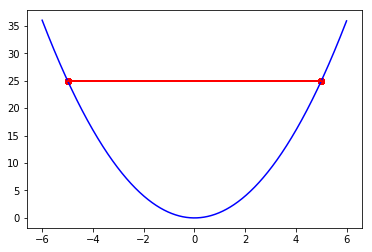

In [12]:
x = gradient_descent(func, -5, lr=1)
t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')
plt.scatter(x, func(x), c='r')
plt.show()

## 建立類別

In [18]:
class Dog:
    def __init__(self, name, breed):
        self.name = name
        self.breed = breed
    def eat(self):
        print(self.name, ' is eating')

cutie = Dog(name='cutie', breed = '馬爾紀思')
Max = Dog(name='Max', breed = '警犬')


In [19]:
cutie.name

'cutie'

In [20]:
cutie.breed

'馬爾紀思'

In [21]:
cutie.eat()

cutie  is eating


## 訓練神經網路

In [92]:

import numpy as np
def  softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

def sigmoid_function(x):
    return 1/ (1 + np.exp(-x))

def dfunc(f, x):
    h = 1e-4 
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'])
    while not it.finished:     
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()   
    return grad

def cross_entropy_err(y_hat, y):
    delta = 1e-8
    return -np.sum(y*np.log(y_hat + delta))

In [93]:
class ANN:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid_function(a1)
        a2 = np.dot(z1, W2) + b2
        y = sigmoid_function(a2)
        return y
        
    def loss(self, x, y):
        y_hat = self.predict(x)
        return cross_entropy_err(y_hat, y)
        
    def numerical_gradient(self, x, y):
        loss_W = lambda W: self.loss(x, y)
        grads = {}
        grads['W1'] = dfunc(loss_W, self.params['W1'])
        grads['b1'] = dfunc(loss_W, self.params['b1'])
        grads['W2'] = dfunc(loss_W, self.params['W2'])
        grads['b2'] = dfunc(loss_W, self.params['b2'])
        return grads

In [140]:
import numpy as np

def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

def sigmoid_function(x):
    return 1/ (1 + np.exp(-x))

def dfunc(f, x):
    h = 1e-4 
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'])
    while not it.finished:     
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()   
    return grad

def cross_entropy_err(y_hat, y):
    delta = 1e-8
    return -np.sum(y*np.log(y_hat + delta))


class ANN:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid_function(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax_function(a2)
        return y
        
    def loss(self, x, y):
        y_hat = self.predict(x)
        return cross_entropy_err(y_hat, y)
        
    def numerical_gradient(self, x, y):
        loss_W = lambda W: self.loss(x, y)
        grads = {}
        grads['W1'] = dfunc(loss_W, self.params['W1'])
        grads['b1'] = dfunc(loss_W, self.params['b1'])
        grads['W2'] = dfunc(loss_W, self.params['W2'])
        grads['b2'] = dfunc(loss_W, self.params['b2'])
        return grads

In [141]:
net = ANN(input_size=4, hidden_size=5, output_size=3)

In [142]:
from sklearn.datasets import load_iris
iris = load_iris()

In [143]:
x= iris.data

In [144]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [145]:
y = np.zeros((len(iris.target), 3))

In [146]:
#y

In [147]:
# one-hot encoding
for idx, val in enumerate(iris.target):
    y[idx, val] = 1

In [148]:
#y

In [149]:
epochs = 3000
lr     = 0.01
train_loss = []
for i in range(epochs):
    grad = net.numerical_gradient(x,y)
    #print(grad)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] = net.params[key] - lr * grad[key]
    loss = net.loss(x, y)
    train_loss.append(loss)

Text(0.5,1,'Training Loss')

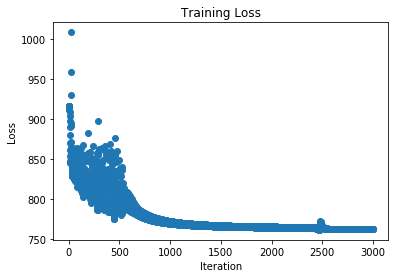

In [150]:
plt.scatter(range(0,3000),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')

In [151]:
#net.predict(x)

In [152]:
from sklearn.metrics import accuracy_score, confusion_matrix
predicted = np.argmax(net.predict(x), axis=1)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [153]:
sum(iris.target == predicted) / len(iris.target)

0.98

## 批次學習

In [154]:
def cross_entropy_err(y_hat, y):
    y      = y.reshape(1, y.size)
    y_hat  = y_hat.reshape(1, y_hat.size)
    batch_size = y_hat.shape[0]
    return -np.sum(y * np.log(y_hat)) / batch_size


In [155]:
np.random.choice([1,2,3,4,5],3)

array([2, 4, 2])

In [156]:
import time

net = ANN(input_size=4, hidden_size=5, output_size=3)

epochs      = 3000
lr          = 0.01
batch_size  = 30

train_loss = []

t0 = time.clock()
for i in range(epochs): 
    idx       = np.random.choice(iris.data.shape[0], batch_size)
    x_batch   = iris.data[idx]
    y_batch   = y[idx]
    grad = net.numerical_gradient(x_batch,y_batch)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] = net.params[key] - lr * grad[key]
    loss = net.loss(x_batch, y_batch)
    train_loss.append(loss)

time.clock() - t0

7.999516989798315

Text(0.5,1,'Training Loss')

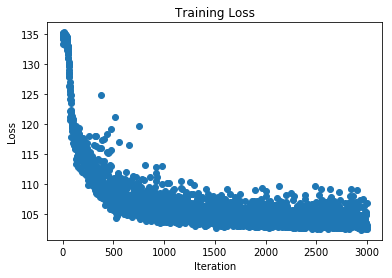

In [135]:
plt.scatter(range(0,3000),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')

In [137]:
predicted = np.argmax(net.predict(x), axis = 1)

In [138]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(iris.target,predicted)

0.98

In [139]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(iris.target,predicted)

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  2, 48]], dtype=int64)

## 反向傳播

In [157]:
class Relu:
    def __init__(self):
        self.cache = None
    
    def forward(self, x):
        self.cache = (x <=0)
        out = np.maximum(0,x)
        return out

    def backward(self, dout):
        dout[self.cache] = 0
        dx = dout
        return dx


In [159]:
a = Relu()
print(a.cache)
x = np.array([-1,1,2])
print(a.forward(x))
print(a.cache)

None
[0 1 2]
[ True False False]


In [161]:
y = np.array([2,3,4])
print(a.backward(y))

[0 3 4]


In [164]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1/ (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        y  = self.out
        dx = dout * y * (1-y)
        return dx


In [167]:
s = Sigmoid()
print(s.out)
x = np.array([-1,1,2])
print(s.forward(x))
print(s.out)

None
[0.26894142 0.73105858 0.88079708]
[0.26894142 0.73105858 0.88079708]


In [168]:
y = np.array([2,3,4])
print(s.backward(y))

[0.39322387 0.5898358  0.41997434]
